# Sensitivity Analysis of PD Model:
This notebook features different experiments to observe the model's behavior with controlled inputs.

In [1]:
import axelrod as axl
from axelrod.action import Action
import copy
from itertools import (zip_longest, 
                      combinations, 
                      combinations_with_replacement)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pd_exp2
import random
import seaborn as sns
import time

C,D = Action.C, Action.D
action_map={0: D, 1: C}

#### Experiment 1: How do the initial moves influence group outcomes?
__Approach__: Fix player response probability parameters to be the same but vary 
the players' initial moves. Specifically, we run 6 x 1000 tournaments with 5 
players that have fixed response probabilities (1, so responses are 
deterministic) and varying initial moves. The initial moves are represented as
an array of 0s and 1s which correspond to actions D and C, respectively. The 
index of the initial moves array plus 1 corresponds to the player number in the
tournament. The initial move array will change after every 1000 tournaments. 
There are six different variations of the initial moves array, which is why we 
run 1000 tournaments six times

In [65]:
# Initialize player parameters - each player has a set of four response
# probabilities and an initial move:
#     The response probabilities to the preceding round of play
#             ( P(C|CC), P(C|CD), P(C|DC), P(C|DD) )
#     Initial: C or D
#             The initial move

five_four_params = np.ones((5,4))
print("Five player response probabilities: \n", five_four_params)
im_list= []
print("LIST of initial moves: ")
for i in range(6):
    im = [1 if n<i else 0 for n in range(5)]
    print(im)
    im_list.append(im)

Five player response probabilities: 
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
LIST of initial moves: 
[0, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 1, 0, 0, 0]
[1, 1, 1, 0, 0]
[1, 1, 1, 1, 0]
[1, 1, 1, 1, 1]


In [3]:
params = five_four_params
data_dict1 = {}
start = time.time()

# Collect the tournament results
for j, i_im in enumerate(im_list):
    plyrs = []
    for i in range(len(params)):
        pl = axl.MemoryOnePlayer(tuple(params[i]),action_map[i_im[i]])
        plyrs.append(pl)
    # RPST payoff matrix - 3, 1, 0, 5 - classic config is also default
    pd1000 = pd_exp2.PdTournament(plyrs, reps=1000)

    df1, df2=pd1000.data, pd1000.agg_data
    data_dict1[j]= (i_im, df1, df2)  # Tuple of initial moves, player norm 
                                     # scores by tournament, aggregate data for
                                     # 1000 tournaments
    
print(f"Tournaments took {time.time() - start} seconds")  # ~222.79 seconds

Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player


Analysing: 100%|██████████| 25/25 [00:00<00:00, 41.43it/s]

Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:00<00:00, 36.62it/s]

Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:00<00:00, 42.70it/s]

Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:00<00:00, 46.25it/s]

Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:00<00:00, 41.03it/s]

Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:00<00:00, 52.62it/s]

Tournaments took 225.01768684387207 seconds


In [45]:
# Process aggregate data of each tournament into a single dataframe for 
# comparison
agg_d_list = []
for key,val in data_dict1.items():
    im_list, data, agg_data = val
    agg_data['initial_moves(as one-count)'] = im_list.count(1)
    data_mat = data.to_numpy()
#     print(data_mat.shape)
    
    # The column below measures l2 distance between tournament 
    # normalized scores and baseline tournament where all players always cooperate
    agg_data['Scores_L2_Dist'] = np.linalg.norm(data.to_numpy()-(np.ones(data_mat.shape)*3))
    
    # The column below measures l1 distance between tournament 
    # CC Distribution and baseline tournament where all players always cooperate
    agg_data['CC_L1_Dist'] = np.abs(agg_data['Avg_CC_Distribution'] - 1)

    agg_d_list.append(agg_data)

comparison_df = pd.concat(agg_d_list)

df=comparison_df[['initial_moves(as one-count)', 'P1_Avg_Norm_Score', 'P2_Avg_Norm_Score','P3_Avg_Norm_Score', 
           'P4_Avg_Norm_Score', 'P5_Avg_Norm_Score','Avg_of_PL_Scores',
           'Scores_L2_Dist','Avg_CC_Distribution','CC_L1_Dist']]

df

,initial_moves(as one-count),P1_Avg_Norm_Score,P2_Avg_Norm_Score,P3_Avg_Norm_Score,P4_Avg_Norm_Score,P5_Avg_Norm_Score,Avg_of_PL_Scores,Scores_L2_Dist,Avg_CC_Distribution,CC_L1_Dist
1000,0,2.489632,2.514715,2.508980,2.490454,2.496311,2.500019,40.384844,0.896116,0.103884
1000,1,2.234449,2.760158,2.766321,2.764996,2.739720,2.653129,35.762422,0.896116,0.103884
1000,2,2.418531,2.456155,2.998372,3.008509,2.989283,2.774170,33.460895,0.906280,0.093720
1000,3,2.611536,2.630193,2.630514,3.248149,3.242292,2.872537,30.990106,0.927165,0.072835
1000,4,2.817443,2.812828,2.810244,2.803952,3.503689,2.949631,25.359131,0.958253,0.041747
1000,5,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,1.000000,0.000000


In [70]:
display(comparison_df)

,P1_Avg_Norm_Score,P1_Min_Norm_Score,P2_Avg_Norm_Score,P2_Min_Norm_Score,P3_Avg_Norm_Score,P3_Min_Norm_Score,P4_Avg_Norm_Score,P4_Min_Norm_Score,P5_Avg_Norm_Score,P5_Min_Norm_Score,Avg_of_PL_Scores,Min_of_PL_Scores,Avg_CC_Distribution,initial_moves(as one-count),Scores_L2_Dist,CC_L1_Dist
100,2.464081,1.722222,2.523387,1.708333,2.523627,1.807018,2.415558,1.400000,2.470648,1.400000,2.479460,1.400000,0.895779,0,13.381606,0.104221
100,2.196121,1.083333,2.767911,1.980952,2.772257,2.064286,2.774693,2.016667,2.690197,1.527778,2.640236,1.083333,0.895779,1,11.807705,0.104221
100,2.379515,1.125000,2.468473,1.375000,2.975106,2.291667,3.024059,2.433333,2.946684,2.283333,2.758767,1.125000,0.905880,2,10.989857,0.094120
100,2.565987,1.500000,2.620610,1.500000,2.624050,1.875000,3.263549,2.569888,3.208460,2.587978,2.856531,1.500000,0.926741,3,10.290162,0.073259
100,2.835338,2.250000,2.807634,2.250000,2.803668,2.250000,2.759331,2.250000,3.529352,3.123002,2.947065,2.250000,0.958849,4,8.607144,0.041151
100,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,5,0.000000,0.000000


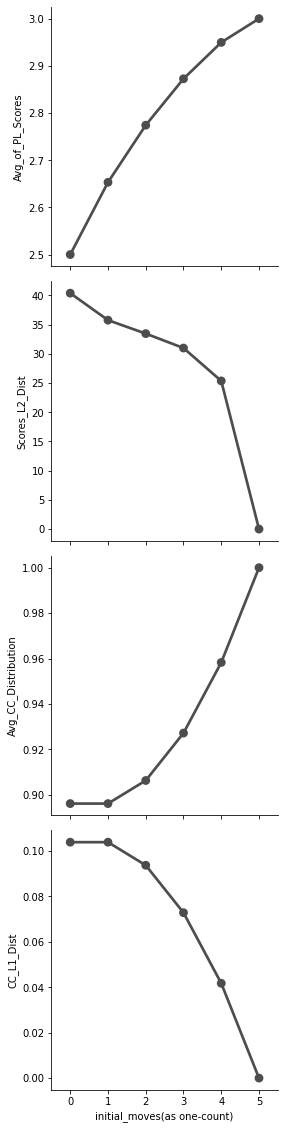

In [40]:
# Plots: Each point is the aggregate of 1000 tournaments with the same initial moves.

g = sns.PairGrid(df, 
                 y_vars=["Avg_of_PL_Scores",
                        "Scores_L2_Dist", 
                        "Avg_CC_Distribution",
                        "CC_L1_Dist"], 
                 x_vars=['initial_moves(as one-count)'], 
                 height=4)
g.map(sns.pointplot, color=".3")
plt.show()

In [ ]:
for i in range(25):
    print()

### TESTING

In [67]:
params = five_four_params
data_dict_test = {}
start = time.time()

# Collect the tournament results
for j, i_im in enumerate(im_list):
    plyrs = []
    for i in range(len(params)):
        pl = axl.MemoryOnePlayer(tuple(params[i]),action_map[i_im[i]])
        plyrs.append(pl)
    # RPST payoff matrix - 3, 1, 0, 5 - classic config is also default
    pd100 = pd_exp2.PdTournament(plyrs, reps=100)

    df1, df2=pd100.data, pd100.agg_data
    data_dict_test[j]= (i_im, df1, df2)  # Tuple of initial moves, player norm 
                                     # scores by tournament, aggregate data for
                                     # 1000 tournaments
    
print(f"Tournaments took {time.time() - start} seconds")  # ~201.55 seconds

Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player


Analysing: 100%|██████████| 25/25 [00:00<00:00, 61.36it/s]

Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:00<00:00, 66.99it/s]

Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:00<00:00, 71.94it/s]

Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:00<00:00, 63.30it/s]

Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:00<00:00, 60.05it/s]

Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:00<00:00, 66.58it/s]

Tournaments took 201.55362606048584 seconds


In [68]:
# Process aggregate data of each tournament into a single dataframe for 
# comparison
agg_d_list = []
for key,val in data_dict_test.items():
    im_list, data, agg_data = val
    agg_data['initial_moves(as one-count)'] = im_list.count(1)
    data_mat = data.to_numpy()
#     print(data_mat.shape)
    
    # The column below measures l2 distance between tournament 
    # normalized scores and baseline tournament where all players always cooperate
    agg_data['Scores_L2_Dist'] = np.linalg.norm(data.to_numpy()-(np.ones(data_mat.shape)*3))
    
    # The column below measures l1 distance between tournament 
    # CC Distribution and baseline tournament where all players always cooperate
    agg_data['CC_L1_Dist'] = np.abs(agg_data['Avg_CC_Distribution'] - 1)

    agg_d_list.append(agg_data)

comparison_df = pd.concat(agg_d_list)

df=comparison_df[['initial_moves(as one-count)', 'P1_Avg_Norm_Score', 'P2_Avg_Norm_Score','P3_Avg_Norm_Score', 
           'P4_Avg_Norm_Score', 'P5_Avg_Norm_Score','Avg_of_PL_Scores',
           'Scores_L2_Dist','Avg_CC_Distribution','CC_L1_Dist']]

df

,initial_moves(as one-count),P1_Avg_Norm_Score,P2_Avg_Norm_Score,P3_Avg_Norm_Score,P4_Avg_Norm_Score,P5_Avg_Norm_Score,Avg_of_PL_Scores,Scores_L2_Dist,Avg_CC_Distribution,CC_L1_Dist
100,0,2.464081,2.523387,2.523627,2.415558,2.470648,2.479460,13.381606,0.895779,0.104221
100,1,2.196121,2.767911,2.772257,2.774693,2.690197,2.640236,11.807705,0.895779,0.104221
100,2,2.379515,2.468473,2.975106,3.024059,2.946684,2.758767,10.989857,0.905880,0.094120
100,3,2.565987,2.620610,2.624050,3.263549,3.208460,2.856531,10.290162,0.926741,0.073259
100,4,2.835338,2.807634,2.803668,2.759331,3.529352,2.947065,8.607144,0.958849,0.041151
100,5,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,1.000000,0.000000


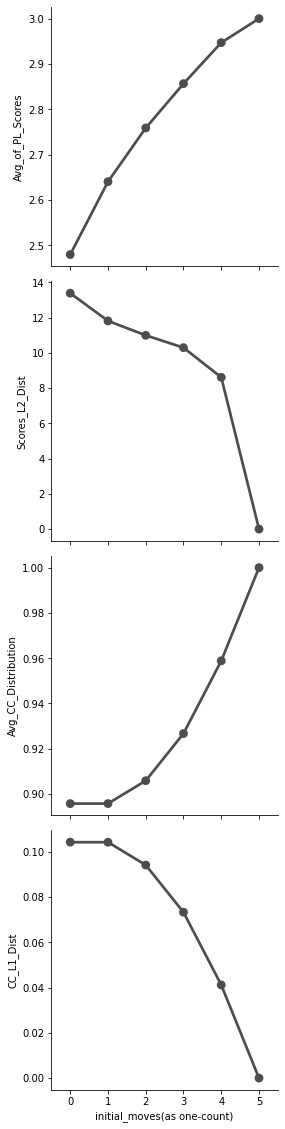

In [69]:
# Plots: Each point is the aggregate of 100 tournaments with the same initial moves.

g = sns.PairGrid(df, 
                 y_vars=["Avg_of_PL_Scores",
                        "Scores_L2_Dist", 
                        "Avg_CC_Distribution",
                        "CC_L1_Dist"], 
                 x_vars=['initial_moves(as one-count)'], 
                 height=4)
g.map(sns.pointplot, color=".3")
plt.show()

#### Experiment 1.1: How do the initial moves influence a larger group's outcomes?
__Approach__: Similar to experiment 1, but we consider tournaments of 15 players.

In [8]:
# Initialize parameters
fifteen_four_params = np.ones((15,4))
print("15 player response probabilities: \n", fifteen_four_params)
im_list1= []
print("LIST of initial moves: ")
for i in range(16):
    im = [1 if n<i else 0 for n in range(15)]
    print(im)
    im_list1.append(im)

15 player response probabilities: 
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
LIST of initial moves: 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1,

In [9]:
params = fifteen_four_params
data_dict1_1 = {}
start = time.time()
for j, i_im in enumerate(im_list1):
    plyrs = []
    for i in range(len(params)):
        pl = axl.MemoryOnePlayer(tuple(params[i]),action_map[i_im[i]])
        plyrs.append(pl)

    # RPST payoff matrix - 3, 1, 0, 5 - classic config is also default
    pd1000 = pd_exp2.PdTournament(plyrs, reps=1000)

    df1, df2=pd1000.data, pd1000.agg_data
    data_dict1_1[j]= (i_im, df1, df2)  # Tuple of initial moves, player norm scores by tournament, aggregate data for 1000 tournaments
    
print(f"Tournaments took {time.time() - start} seconds")  # ~1087.048201084137 seconds

Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player


Analysing: 100%|██████████| 25/25 [00:03<00:00,  6.83it/s]

Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:02<00:00,  9.27it/s]


Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player


Analysing: 100%|██████████| 25/25 [00:02<00:00,  8.34it/s]


Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player


Analysing: 100%|██████████| 25/25 [00:02<00:00,  9.21it/s]

Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:03<00:00,  7.97it/s]

Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:02<00:00,  8.92it/s]

Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:03<00:00,  8.12it/s]

Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:02<00:00,  8.99it/s]

Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:02<00:00,  9.38it/s]

Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:03<00:00,  7.65it/s]

Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:02<00:00,  8.98it/s]

Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:02<00:00,  9.50it/s]


Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player


Analysing: 100%|██████████| 25/25 [00:04<00:00,  5.79it/s]

Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:03<00:00,  7.26it/s]


Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player


Analysing: 100%|██████████| 25/25 [00:02<00:00,  9.49it/s]


Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player


Analysing: 100%|██████████| 25/25 [00:02<00:00,  8.54it/s]

Tournaments took 919.7867472171783 seconds


In [46]:
# Process aggregate data of each tournament into a single dataframe for 
# comparison
agg_d_list = []
for key,val in data_dict1_1.items():
    im_list, data, agg_data = val
    agg_data['initial_moves(as one-count)'] = im_list.count(1)
    data_mat = data.to_numpy()
#     print(data_mat.shape)
    
    # The column below measures l2 distance between tournament 
    # normalized scores and baseline tournament where all players always cooperate
    agg_data['Scores_L2_Dist'] = np.linalg.norm(data.to_numpy()-(np.ones(data_mat.shape)*3))
    
    # The column below measures l1 distance between tournament 
    # CC Distribution and baseline tournament where all players always cooperate
    agg_data['CC_L1_Dist'] = np.abs(agg_data['Avg_CC_Distribution'] - 1)

    agg_d_list.append(agg_data)

comparison_df = pd.concat(agg_d_list)

df=comparison_df[['initial_moves(as one-count)', 'P1_Avg_Norm_Score', 'P2_Avg_Norm_Score','P3_Avg_Norm_Score', 
           'P4_Avg_Norm_Score', 'P5_Avg_Norm_Score','Avg_of_PL_Scores',
           'Scores_L2_Dist','Avg_CC_Distribution','CC_L1_Dist']]

df

,initial_moves(as one-count),P1_Avg_Norm_Score,P2_Avg_Norm_Score,P3_Avg_Norm_Score,P4_Avg_Norm_Score,P5_Avg_Norm_Score,Avg_of_PL_Scores,Scores_L2_Dist,Avg_CC_Distribution,CC_L1_Dist
1000,0,2.491948,2.490722,2.490709,2.481435,2.489555,2.487875,65.377653,0.895696,0.104304
1000,1,2.237921,2.560849,2.564235,2.559875,2.559101,2.538680,60.441069,0.895696,0.104304
1000,2,2.290516,2.288678,2.639297,2.632730,2.632891,2.587271,56.076063,0.896664,0.103336
1000,3,2.345661,2.344974,2.347504,2.708568,2.706212,2.633247,52.202800,0.898735,0.101265
1000,4,2.404491,2.399615,2.404382,2.392502,2.778168,2.677532,48.848393,0.901799,0.098201
1000,5,2.456650,2.454958,2.459373,2.446469,2.450793,2.718956,46.026229,0.905785,0.094215
1000,6,2.512697,2.508632,2.514625,2.502332,2.507077,2.757843,43.548571,0.910732,0.089268
1000,7,2.562423,2.561518,2.567735,2.556792,2.564373,2.794238,41.444624,0.916666,0.083334
1000,8,2.614604,2.617888,2.623394,2.615499,2.621625,2.828729,39.504900,0.923653,0.076347
1000,9,2.668082,2.673844,2.676264,2.670526,2.674256,2.860417,37.871975,0.931452,0.068548


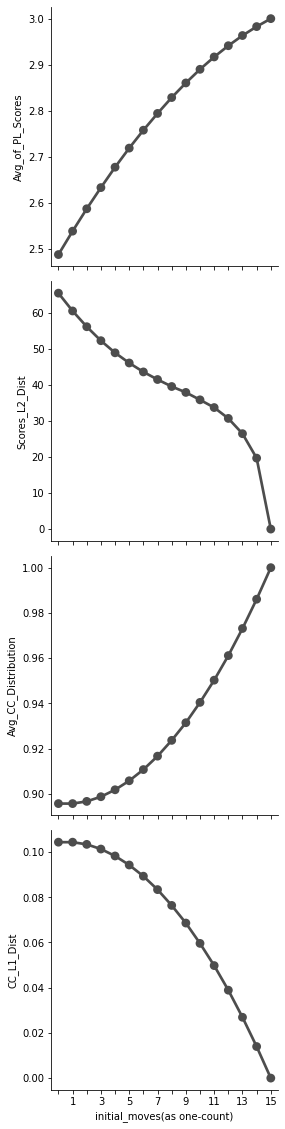

In [44]:
g = sns.PairGrid(df, y_vars=["Avg_of_PL_Scores","Scores_L2_Dist", 
                             "Avg_CC_Distribution", "CC_L1_Dist"], x_vars=["initial_moves(as one-count)"], height=4)
g.map(sns.pointplot, color=".3")
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i%2 == 0): labels[i] = '' # skip even labels
    ax.set_xticklabels(labels) # set new labels
plt.show()

#### Experiement 2: How does a change in a single response probability for one player influence group outcomes?
__Approach__: Fix large majority of the response probability parameters 
to be the same but vary the first response probability for one player. All the 
other parameters will be equivalent across the players. Specifically, we run 
$k$ x 1000 tournaments with 5 players that have mostly similar response 
probabilities and fixed initial moves. $k$ is the number of variations of the 
response probability with which we experiment.

In [52]:
# Initialize player parameters 
rng = np.random.default_rng(2)
random_prob = rng.integers(90, 100)/100
five_players = np.ones((5,4))

five_players[0,0] = random_prob
print("Five player response probabilities: \n", five_players)
im_list2 = np.ones((5))
print("LIST of initial moves: ", im_list2)

Five player response probabilities: 
 [[0.98 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
LIST of initial moves:  [1. 1. 1. 1. 1.]


In [53]:
# Initialize player parameters 
rng = np.random.default_rng(2)
random_prob = rng.integers(90, 100)/100
five_players = np.ones((5,4))

five_players[0,0] = random_prob
print("Five player response probabilities: \n", five_players)
im_list2 = np.ones((5))
print("LIST of initial moves: ", im_list2)

Five player response probabilities: 
 [[0.98 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
LIST of initial moves:  [1. 1. 1. 1. 1.]


In [54]:
params, initial_moves = five_players, im_list2
data_dict2 = {}
start = time.time()

for k in range(85,101):
    params[0,0] = k/100
    print("Five player response probabilities: \n", params)
    plyrs = []
    for j, p_i in enumerate(params):
        pl = axl.MemoryOnePlayer(tuple(p_i),action_map[im_list2[j]])
        plyrs.append(pl)

    # pd tournament 1000
    # RPST payoff matrix - 3, 1, 0, 5 - classic config is also default
    pd1000 = pd_exp2.PdTournament(plyrs, reps=1000)

    df1, df2=pd1000.data, pd1000.agg_data
    data_dict2[k]= (params[0,0], df1, df2)  # Tuple of initial moves, player norm scores by tournament, aggregate data for 1000 tournaments
    
print(f"Tournaments took {time.time() - start} seconds")  # ~308.2929379940033 seconds

Five player response probabilities: 
 [[0.85 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player


Analysing: 100%|██████████| 25/25 [00:00<00:00, 39.70it/s]

Five player response probabilities: 
 [[0.86 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:00<00:00, 38.26it/s]

Five player response probabilities: 
 [[0.87 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:00<00:00, 45.32it/s]

Five player response probabilities: 
 [[0.88 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:00<00:00, 43.35it/s]

Five player response probabilities: 
 [[0.89 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:00<00:00, 42.23it/s]

Five player response probabilities: 
 [[0.9 1.  1.  1. ]
 [1.  1.  1.  1. ]
 [1.  1.  1.  1. ]
 [1.  1.  1.  1. ]
 [1.  1.  1.  1. ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:00<00:00, 39.57it/s]

Five player response probabilities: 
 [[0.91 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:00<00:00, 40.77it/s]

Five player response probabilities: 
 [[0.92 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:00<00:00, 37.70it/s]

Five player response probabilities: 
 [[0.93 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:00<00:00, 45.40it/s]

Five player response probabilities: 
 [[0.94 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:00<00:00, 43.32it/s]

Five player response probabilities: 
 [[0.95 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:00<00:00, 42.18it/s]


Five player response probabilities: 
 [[0.96 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player


Analysing: 100%|██████████| 25/25 [00:00<00:00, 44.82it/s]

Five player response probabilities: 
 [[0.97 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:00<00:00, 49.49it/s]

Five player response probabilities: 
 [[0.98 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:00<00:00, 43.34it/s]

Five player response probabilities: 
 [[0.99 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:00<00:00, 31.19it/s]

Five player response probabilities: 
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:00<00:00, 36.13it/s]

Tournaments took 644.270122051239 seconds


In [55]:
agg_d_list = []
for key,val in data_dict2.items():
    pl1_param, data, agg_data = val
    agg_data['pl1_p(C|CC)'] = str(pl1_param)
    data_mat = data.to_numpy()
#     print(data_mat.shape)
    
    # The column below measures l2 distance between tournament 
    # normalized scores and baseline tournament where all players always cooperate
    agg_data['Scores_L2_Dist'] = np.linalg.norm(data.to_numpy()-(np.ones(data_mat.shape)*3))
    
    # The column below measures l1 distance between tournament 
    # CC Distribution and baseline tournament where all players always cooperate
    agg_data['CC_L1_Dist'] = np.abs(agg_data['Avg_CC_Distribution'] - 1)

    agg_d_list.append(agg_data)

comparison_df = pd.concat(agg_d_list)

df=comparison_df[['pl1_p(C|CC)', 'P1_Avg_Norm_Score', 'P2_Avg_Norm_Score','P3_Avg_Norm_Score', 
           'P4_Avg_Norm_Score', 'P5_Avg_Norm_Score','Avg_of_PL_Scores',
           'Scores_L2_Dist','Avg_CC_Distribution', 'CC_L1_Dist']]
df

,pl1_p(C|CC),P1_Avg_Norm_Score,P2_Avg_Norm_Score,P3_Avg_Norm_Score,P4_Avg_Norm_Score,P5_Avg_Norm_Score,Avg_of_PL_Scores,Scores_L2_Dist,Avg_CC_Distribution,CC_L1_Dist
1000,0.85,3.195831,2.925221,2.925984,2.929145,2.925904,2.980417,10.006528,0.952585,0.047415
1000,0.86,3.183749,2.929733,2.931353,2.932984,2.930307,2.981625,9.532317,0.955514,0.044486
1000,0.87,3.172220,2.933121,2.936063,2.937752,2.934735,2.982778,9.081057,0.958409,0.041591
1000,0.88,3.159543,2.937469,2.940182,2.943302,2.939732,2.984046,8.557000,0.961507,0.038493
1000,0.89,3.147183,2.941899,2.944763,2.948416,2.944148,2.985282,8.057450,0.964519,0.035481
1000,0.9,3.134988,2.945932,2.949449,2.953261,2.948875,2.986501,7.573267,0.967523,0.032477
1000,0.91,3.123742,2.950924,2.954714,2.956050,2.952699,2.987626,7.123266,0.970241,0.029759
1000,0.92,3.112554,2.954524,2.958988,2.960489,2.957169,2.988745,6.661385,0.973064,0.026936
1000,0.93,3.099074,2.958481,2.964849,2.965992,2.962066,2.990093,6.103130,0.976036,0.023964
1000,0.94,3.084116,2.964400,2.970083,2.970723,2.968620,2.991588,5.433867,0.979489,0.020511


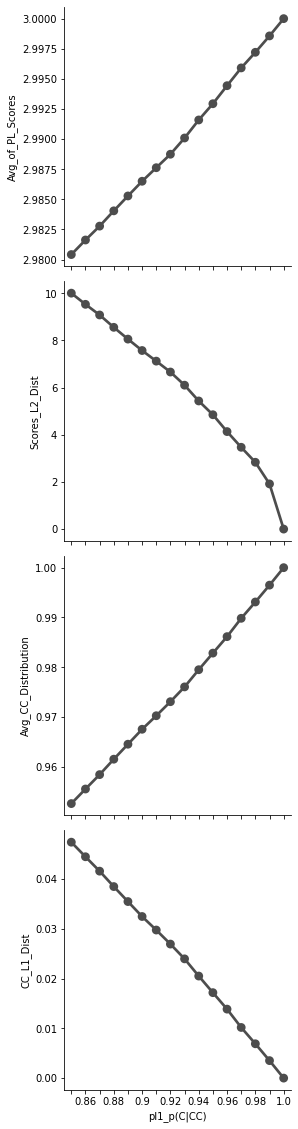

In [57]:
g = sns.PairGrid(df, y_vars=["Avg_of_PL_Scores","Scores_L2_Dist", 
                             "Avg_CC_Distribution", "CC_L1_Dist"], x_vars=["pl1_p(C|CC)"], height=4)
g.map(sns.pointplot, color=".3")
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i%2 == 0): labels[i] = '' # skip even labels
    ax.set_xticklabels(labels) # set new labels
plt.show()

#### Experiement 2.1: How does a change in a single response probability for one player influence larger group outcomes?
__Approach__: Similar to experiment 2, but this time with a group of 15 players.

In [22]:
# Initialize parameters
rng = np.random.default_rng(3)
random_prob = rng.integers(90, 100)/100
fifteen_players = np.ones((15,4))

fifteen_players[0,0] = random_prob
print("Fifteen player response probabilities: \n", fifteen_players)
im_list3 = np.ones((15))
print("LIST of initial moves: ", im_list3)

Fifteen player response probabilities: 
 [[0.98 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
LIST of initial moves:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [23]:
params, initial_moves = fifteen_players, im_list3
data_dict2_1 = {}
start = time.time()

# Collect results
for k in range(85,101):
    params[0,0] = k/100
    print("Variable response probability for first player: \n", params[0,0])
    plyrs = []
    for j, p_i in enumerate(params):
        pl = axl.MemoryOnePlayer(tuple(p_i),action_map[initial_moves[j]])
        plyrs.append(pl)

    pd1000 = pd_exp2.PdTournament(plyrs, reps=1000)

    df1, df2=pd1000.data, pd1000.agg_data
    data_dict2_1[k]= (params[0,0], df1, df2)  # Tuple of initial moves, player 
                                           # norm scores by tournament, 
                                           # aggregate data for 1000 tournaments
    
print(f"Tournaments took {time.time() - start} seconds")  # ~308.2929379940033 seconds

Five player response probabilities: 
 [[0.85 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player


Analysing: 100%|██████████| 25/25 [00:02<00:00,  9.36it/s]

Five player response probabilities: 
 [[0.86 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:02<00:00,  8.68it/s]


Five player response probabilities: 
 [[0.87 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player


Analysing: 100%|██████████| 25/25 [00:02<00:00,  9.14it/s]

Five player response probabilities: 
 [[0.88 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:03<00:00,  7.83it/s]

Five player response probabilities: 
 [[0.89 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:02<00:00,  9.11it/s]


Five player response probabilities: 
 [[0.9 1.  1.  1. ]
 [1.  1.  1.  1. ]
 [1.  1.  1.  1. ]
 [1.  1.  1.  1. ]
 [1.  1.  1.  1. ]
 [1.  1.  1.  1. ]
 [1.  1.  1.  1. ]
 [1.  1.  1.  1. ]
 [1.  1.  1.  1. ]
 [1.  1.  1.  1. ]
 [1.  1.  1.  1. ]
 [1.  1.  1.  1. ]
 [1.  1.  1.  1. ]
 [1.  1.  1.  1. ]
 [1.  1.  1.  1. ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player


Analysing: 100%|██████████| 25/25 [00:02<00:00,  8.71it/s]


Five player response probabilities: 
 [[0.91 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player


Analysing: 100%|██████████| 25/25 [00:02<00:00,  8.83it/s]


Five player response probabilities: 
 [[0.92 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player


Analysing: 100%|██████████| 25/25 [00:02<00:00,  8.82it/s]


Five player response probabilities: 
 [[0.93 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player


Analysing: 100%|██████████| 25/25 [00:02<00:00,  8.80it/s]


Five player response probabilities: 
 [[0.94 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player


Analysing: 100%|██████████| 25/25 [00:03<00:00,  8.29it/s]


Five player response probabilities: 
 [[0.95 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player


Analysing: 100%|██████████| 25/25 [00:02<00:00,  8.40it/s]


Five player response probabilities: 
 [[0.96 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player


Analysing: 100%|██████████| 25/25 [00:03<00:00,  8.01it/s]


Five player response probabilities: 
 [[0.97 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player


Analysing: 100%|██████████| 25/25 [00:03<00:00,  8.14it/s]


Five player response probabilities: 
 [[0.98 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player


Analysing: 100%|██████████| 25/25 [00:03<00:00,  7.68it/s]


Five player response probabilities: 
 [[0.99 1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]
 [1.   1.   1.   1.  ]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player


Analysing: 100%|██████████| 25/25 [00:03<00:00,  7.22it/s]

Five player response probabilities: 
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
Instantiating tournament object with these players:  Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player,Generic Memory One Player



Analysing: 100%|██████████| 25/25 [00:02<00:00,  8.61it/s]


Tournaments took 952.3476951122284 seconds


In [62]:
agg_d_list = []
for key,val in data_dict2_1.items():
    pl1_param, data, agg_data = val
    agg_data['pl1_p(C|CC)'] = str(pl1_param)
    data_mat = data.to_numpy()
#     print(data_mat.shape)
    
    # The column below measures l2 distance between tournament 
    # normalized scores and baseline tournament where all players always cooperate
    agg_data['Scores_L2_Dist'] = np.linalg.norm(data.to_numpy()-(np.ones(data_mat.shape)*3))
    
    # The column below measures l1 distance between tournament 
    # CC Distribution and baseline tournament where all players always cooperate
    agg_data['CC_L1_Dist'] = np.abs(agg_data['Avg_CC_Distribution'] - 1)

    agg_d_list.append(agg_data)

comparison_df = pd.concat(agg_d_list)

df_players=comparison_df[['pl1_p(C|CC)','P1_Avg_Norm_Score', 'P2_Avg_Norm_Score','P3_Avg_Norm_Score', 
           'P4_Avg_Norm_Score', 'P5_Avg_Norm_Score','P6_Avg_Norm_Score', 'P7_Avg_Norm_Score','P8_Avg_Norm_Score', 
           'P9_Avg_Norm_Score', 'P10_Avg_Norm_Score','P11_Avg_Norm_Score', 'P12_Avg_Norm_Score','P13_Avg_Norm_Score', 
           'P14_Avg_Norm_Score', 'P15_Avg_Norm_Score',]]
display(df_players)

df=comparison_df[['pl1_p(C|CC)','Avg_of_PL_Scores',
           'Scores_L2_Dist','Avg_CC_Distribution', 'CC_L1_Dist']]
df

,pl1_p(C|CC),P1_Avg_Norm_Score,P2_Avg_Norm_Score,P3_Avg_Norm_Score,P4_Avg_Norm_Score,P5_Avg_Norm_Score,P6_Avg_Norm_Score,P7_Avg_Norm_Score,P8_Avg_Norm_Score,P9_Avg_Norm_Score,P10_Avg_Norm_Score,P11_Avg_Norm_Score,P12_Avg_Norm_Score,P13_Avg_Norm_Score,P14_Avg_Norm_Score,P15_Avg_Norm_Score
1000,0.85,3.198428,2.978635,2.978853,2.979756,2.978830,2.977486,2.978695,2.978054,2.977895,2.978829,2.979502,2.979530,2.979364,2.977681,2.979249
1000,0.86,3.186992,2.979924,2.980386,2.980853,2.980088,2.978780,2.979827,2.979315,2.979111,2.979914,2.980750,2.980826,2.980504,2.979238,2.979998
1000,0.87,3.175129,2.980892,2.981732,2.982215,2.981353,2.980203,2.981065,2.980500,2.980546,2.981030,2.982081,2.982314,2.981888,2.980215,2.981271
1000,0.88,3.161782,2.982134,2.982909,2.983800,2.982781,2.981702,2.982478,2.982005,2.982123,2.982484,2.983299,2.983753,2.983427,2.981808,2.982624
1000,0.89,3.148913,2.983400,2.984218,2.985262,2.984042,2.983280,2.983550,2.983251,2.983364,2.983865,2.984628,2.985223,2.984952,2.983465,2.984131
1000,0.9,3.136754,2.984552,2.985557,2.986646,2.985393,2.984756,2.985060,2.984561,2.984661,2.984979,2.985604,2.986626,2.986217,2.984813,2.985445
1000,0.91,3.124394,2.985978,2.987061,2.987443,2.986486,2.986480,2.986226,2.986226,2.986231,2.986217,2.986623,2.987851,2.987834,2.985913,2.986840
1000,0.92,3.112131,2.987007,2.988282,2.988711,2.987763,2.987818,2.987858,2.987500,2.987535,2.987633,2.987946,2.989171,2.988993,2.987284,2.988303
1000,0.93,3.098757,2.988137,2.989957,2.990284,2.989162,2.989482,2.989418,2.988833,2.988991,2.989020,2.989123,2.990368,2.990321,2.988903,2.989866
1000,0.94,3.084409,2.989829,2.991452,2.991635,2.991034,2.991173,2.990656,2.990603,2.989913,2.990800,2.990696,2.991912,2.991911,2.990508,2.991264


,pl1_p(C|CC),Avg_of_PL_Scores,Scores_L2_Dist,Avg_CC_Distribution,CC_L1_Dist
1000,0.85,2.993386,7.559007,0.984207,0.015793
1000,0.86,2.993767,7.172652,0.985128,0.014872
1000,0.87,2.994162,6.772900,0.986097,0.013903
1000,0.88,2.994607,6.326353,0.987110,0.012890
1000,0.89,2.995036,5.889226,0.988108,0.011892
1000,0.9,2.995442,5.475014,0.989070,0.010930
1000,0.91,2.995854,5.053614,0.990071,0.009929
1000,0.92,2.996262,4.648636,0.991100,0.008900
1000,0.93,2.996708,4.202211,0.992155,0.007845
1000,0.94,2.997186,3.696370,0.993250,0.006750


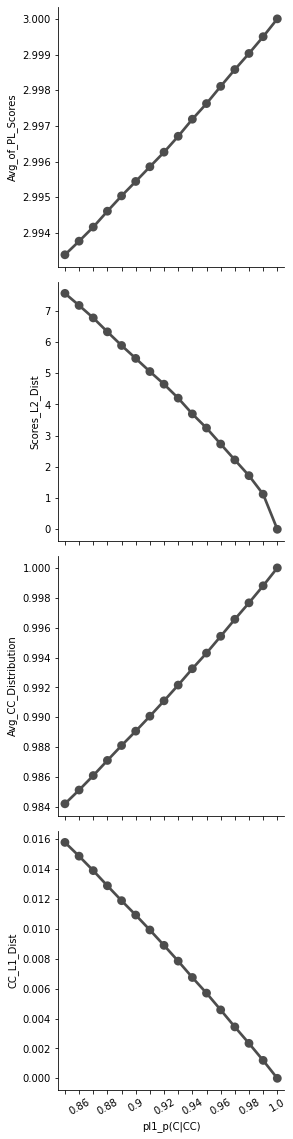

In [63]:
g = sns.PairGrid(df, y_vars=["Avg_of_PL_Scores","Scores_L2_Dist",
                             "Avg_CC_Distribution", "CC_L1_Dist"], 
                 x_vars=["pl1_p(C|CC)"], height=4)
g.map(sns.pointplot, color=".3")
# g.set(xticks=[0.85, 0.9, 0.95, 1])
for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels
    for i,l in enumerate(labels):
        if(i%2 == 0): labels[i] = '' # skip even labels
    ax.set_xticklabels(labels, rotation=30) # set new labels
plt.show()
